In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [462]:
loan=pd.read_csv('C:/Users/User/Desktop/DATA/ML_Projects/datasets/loan_prediction.csv')

In [463]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [464]:
loan.shape

(614, 13)

In [465]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [466]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [467]:
loan.drop('Loan_ID',axis=1,inplace=True)

In [468]:
cols=loan.columns

In [469]:
colsun=loan[[ 'Gender', 'Married', 'Dependents',
       'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

In [470]:
for i in colsun:
    uni=loan[i].unique()
    print(f'Feature={i} : {uni}\n')

Feature=Gender : ['Male' 'Female' nan]

Feature=Married : ['No' 'Yes' nan]

Feature=Dependents : ['0' '1' '2' '3+' nan]

Feature=Self_Employed : ['No' 'Yes' nan]

Feature=LoanAmount : [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.

In [471]:
numcols=loan[['LoanAmount','Loan_Amount_Term', 'Credit_History','ApplicantIncome','CoapplicantIncome']]

In [472]:
catcols=['Gender', 'Married', 'Dependents','Self_Employed','Property_Area', 'Loan_Status','Education']

In [473]:
catnul=['Gender', 'Married', 'Dependents','Self_Employed']
for i in catnul:
    loan[i].fillna(method='ffill',inplace=True)
    print(f'Feature :{i},\nValue Counts:\n\n{loan[i].value_counts()}\n')

Feature :Gender,
Value Counts:

Male      500
Female    114
Name: Gender, dtype: int64

Feature :Married,
Value Counts:

Yes    400
No     214
Name: Married, dtype: int64

Feature :Dependents,
Value Counts:

0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64

Feature :Self_Employed,
Value Counts:

No     528
Yes     86
Name: Self_Employed, dtype: int64



In [474]:
numnul=loan[['LoanAmount','Loan_Amount_Term', 'Credit_History']]
for i in numnul:
    loan[i].fillna(loan[i].median(),inplace=True)
    print(f'Feature :{i},\nValue Counts:\n{loan[i].value_counts()}\n')
    print(f'null: {loan[i].isnull().sum()}\n')

Feature :LoanAmount,
Value Counts:
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

null: 0

Feature :Loan_Amount_Term,
Value Counts:
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

null: 0

Feature :Credit_History,
Value Counts:
1.0    525
0.0     89
Name: Credit_History, dtype: int64

null: 0



In [475]:
cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [476]:
Q1 = numcols.quantile(0.25)
Q3 = numcols.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define threshold for identifying outliers
threshold = 1.5

# Find outliers (data points beyond Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)
outliers = (numcols < (Q1 - threshold * IQR)) | (numcols > (Q3 + threshold * IQR))

# Print outliers
print("Outliers:")
print(outliers)

Outliers:
     LoanAmount  Loan_Amount_Term  Credit_History  ApplicantIncome  \
0         False             False           False            False   
1         False             False           False            False   
2         False             False           False            False   
3         False             False           False            False   
4         False             False           False            False   
..          ...               ...             ...              ...   
609       False             False           False            False   
610       False              True           False            False   
611       False             False           False            False   
612       False             False           False            False   
613       False             False            True            False   

     CoapplicantIncome  
0                False  
1                False  
2                False  
3                False  
4                False  

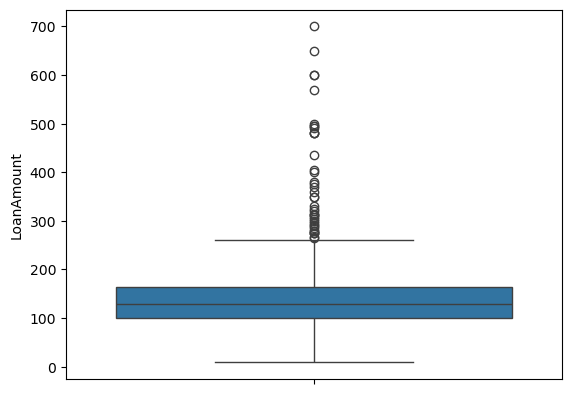

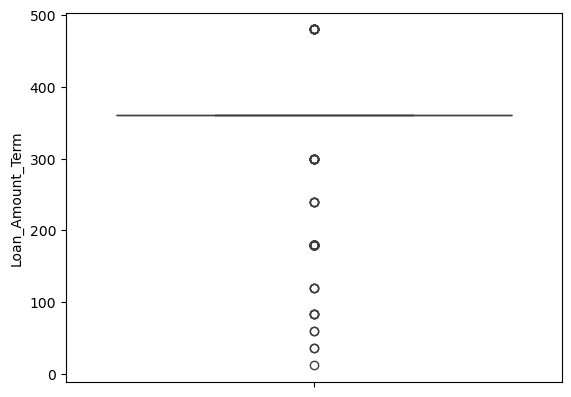

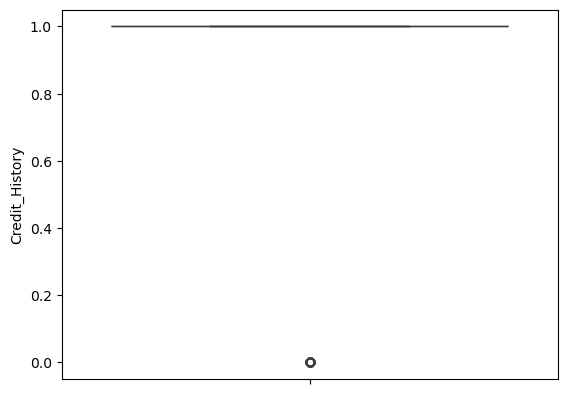

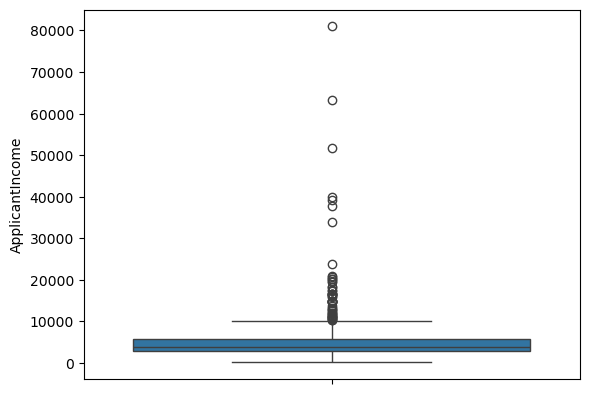

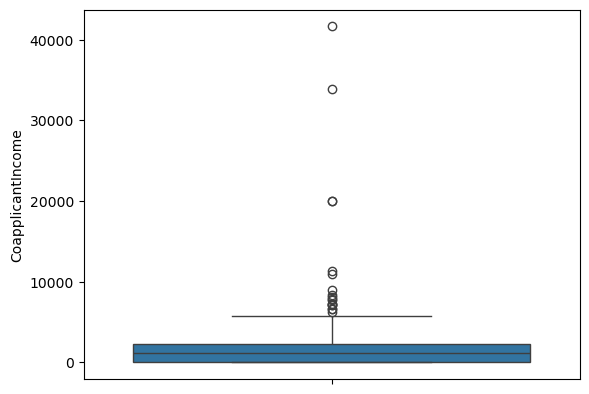

In [477]:
for i in numcols:
    sns.boxplot(loan[i])
    plt.xticks(rotation=45)
    plt.show()

In [478]:
# outcol=loan[['Applicantincome','coapplicantincome']]
# for i in outcol:
# # Calculate the IQR
# Q1 = loan[i].quantile(0.25)
# Q3 = loan[i].quantile(0.75)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers
# loan = loan[(loan[i] >= lower_bound) & (loan[i] <= upper_bound)]

### Distribution of Features

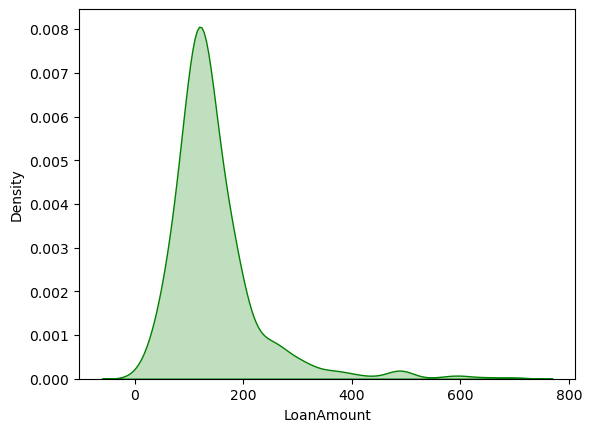

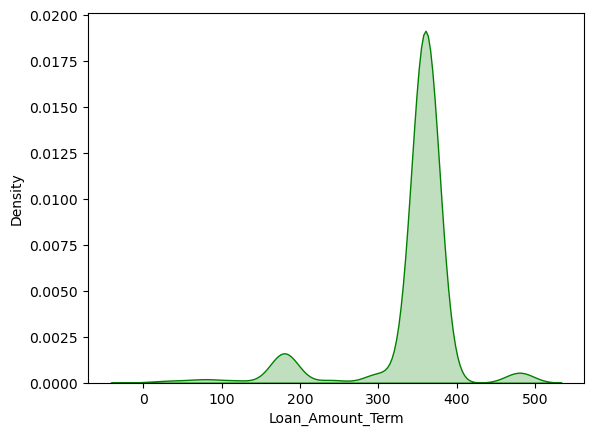

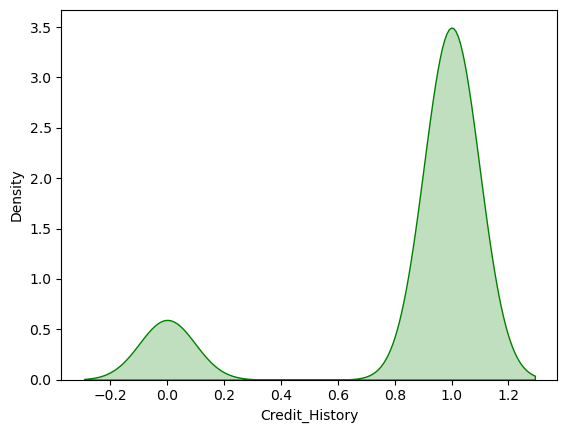

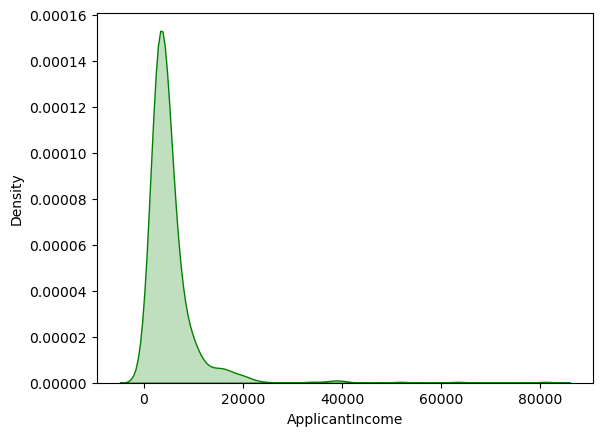

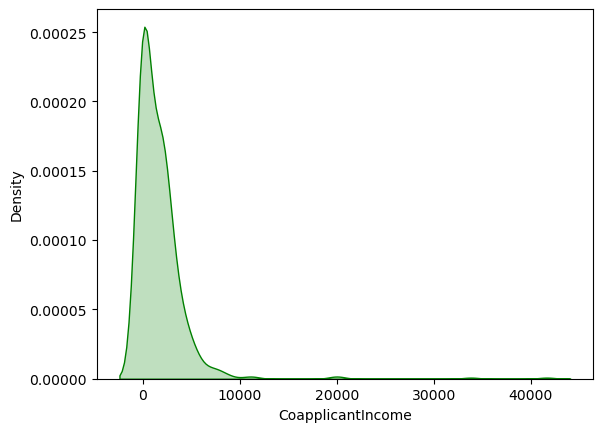

In [479]:
for i in numcols:
    sns.kdeplot(loan[i],fill=True,color='green')
    plt.show()

- The features either in Left Skewed or in Right skewed but none of the is normally distributed

## Loan Status Distribution

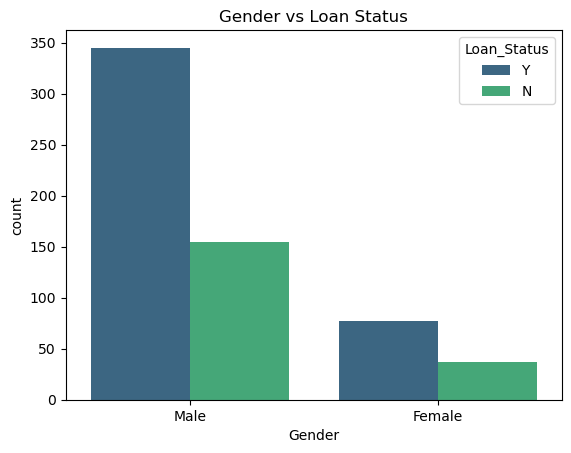

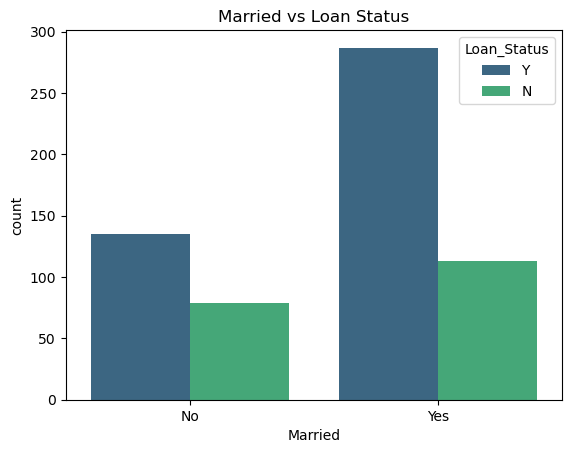

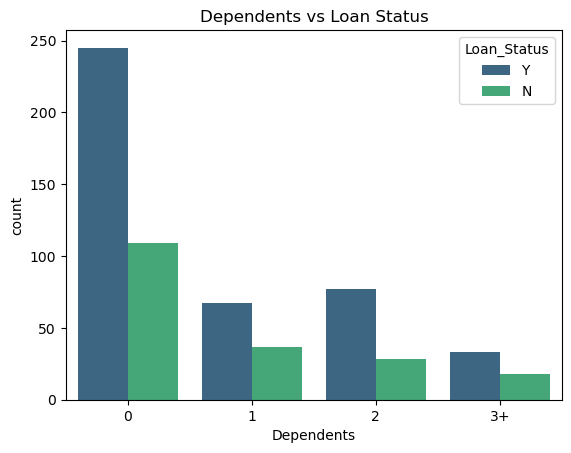

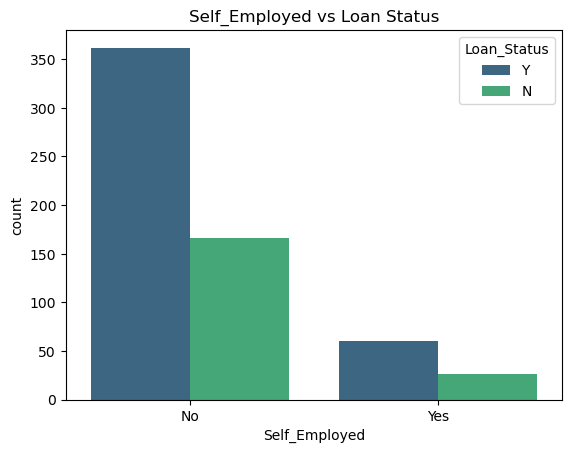

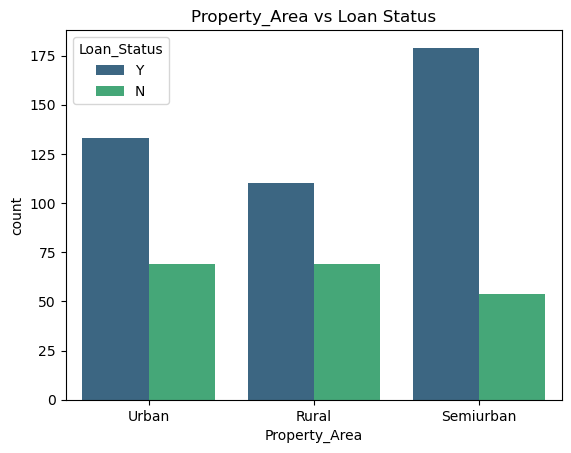

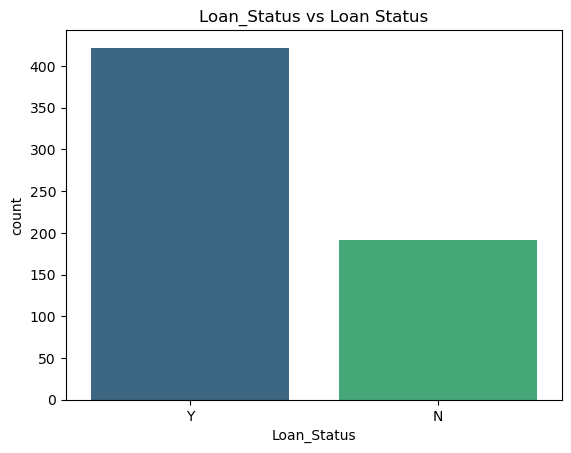

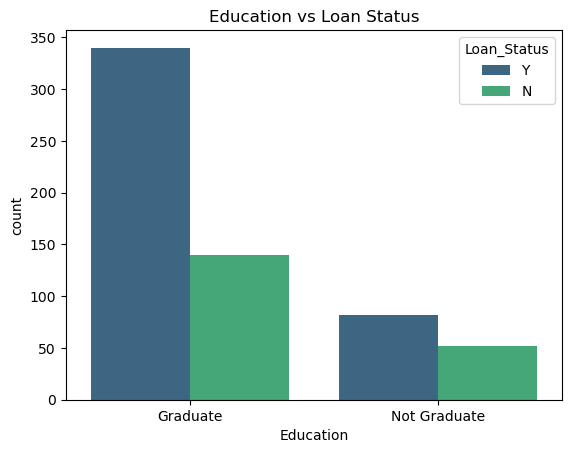

In [480]:
for i in catcols:
    sns.countplot(x=loan[i],hue=loan['Loan_Status'],palette='viridis')
    plt.title(f'{i} vs Loan Status')
    plt.show()

- In case of Gender classification Males are dominant in appliying and males are the one who got approved and thats because as per data most of the applicants are male
- In case of married the applicants who are married got approved comparing with non-married
- Graduates are more who in applicants and who got approvel for loans
- in case of property area and dependents described below:

### Dependents

In [481]:
loan.groupby(loan['Loan_Status'])['Dependents'].get_group('Y').value_counts()

0     245
2      77
1      67
3+     33
Name: Dependents, dtype: int64

- Those who with zero dependents are about 354 and in it 245 got aproved

### Property_area

In [482]:
loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [483]:
loan.groupby(loan['Loan_Status'])['Property_Area'].get_group('Y').value_counts()

Semiurban    179
Urban        133
Rural        110
Name: Property_Area, dtype: int64

- In case of Property_area those with semi_urban are more about 233 and 179 of them got approved
- In case of property in rural area are less in number of applicants and in getting approved

<Axes: xlabel='Property_Area', ylabel='ApplicantIncome'>

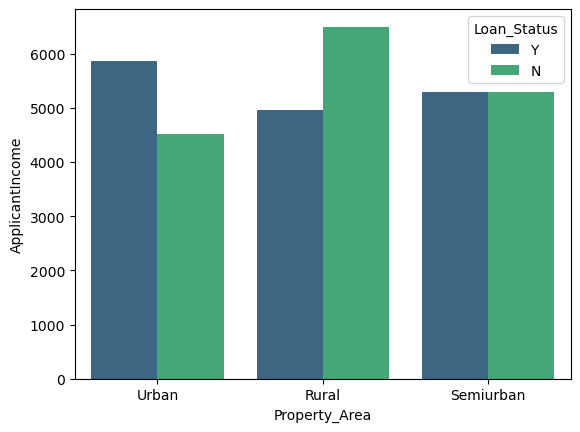

In [484]:
sns.barplot(x='Property_Area',y='ApplicantIncome',data=loan,hue='Loan_Status',palette='viridis',errorbar=None)

- Applicants income level is same in case of semi-urban property holders for both who got approved and not 

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

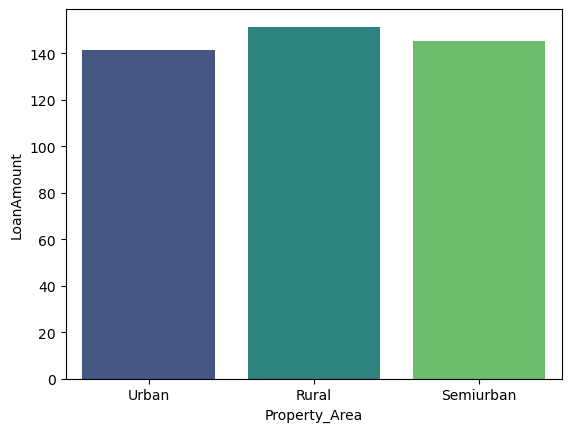

In [485]:
sns.barplot(x='Property_Area',y='LoanAmount',data=loan,palette='viridis',errorbar=None)

- also note that the loan amount was greater in case of individuals with rural property area

## Relation among Features

## Correlation

<Axes: >

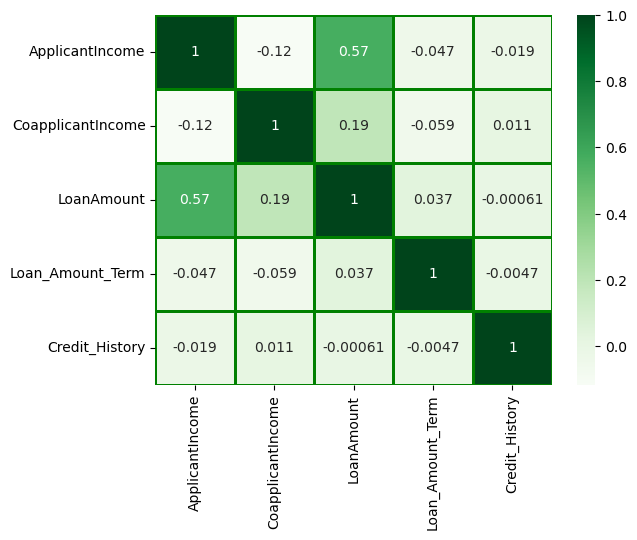

In [486]:
sns.heatmap(loan.corr(),cmap='Greens',annot=True,linewidth=1,linecolor='green')

- While checking the correlation Applicant income and the loan amount are showing the highest positive relation
- And secondly with a positive correlation of 0.19 Loan amount and applicant income are related
- We can also say that the relation between applicant income and the co-applicant income are showing negative correlation.

# Data Split, Data standardizing, Data scaling, Model Creation

In [487]:
X=loan.drop('Loan_Status',axis=1)

In [488]:
y=loan['Loan_Status']

### LABEL ENCODING

In [489]:
from sklearn.preprocessing import LabelEncoder

In [490]:
lb=LabelEncoder()

In [491]:
catcols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Education']

In [492]:
cols=['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'Property_Area',
 'Education']

In [493]:
for col in cols:
    X[col]=lb.fit_transform(X[col].values)

In [494]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


### Standard scaling

In [495]:
from sklearn.preprocessing import StandardScaler

In [496]:
st=StandardScaler()

In [497]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X[numerical_cols] = st.fit_transform(X[numerical_cols])

## TRAIN TEST SPLIT

In [498]:
from sklearn.model_selection import train_test_split 

In [499]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=21)

## Model Creation

In [500]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [501]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)
svc=SVC(random_state=42)

## Decision Tree

In [503]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [504]:
predicttree=dt.predict(x_test)

In [506]:
predicttree

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [508]:
from sklearn.metrics import accuracy_score

In [510]:
print("Accuracy is ",accuracy_score(y_test,predicttree))

Accuracy is  0.8048780487804879


In [511]:
from sklearn.tree import plot_tree

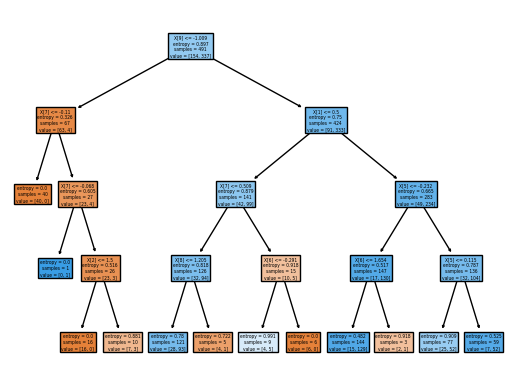

In [513]:
plot_tree(dt,filled=True)
plt.show()

## SVM

In [516]:
svc.fit(x_test,y_test)

SVC(random_state=42)

In [517]:
pred=svc.predict(x_test)

In [518]:
pred

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [519]:
print("Accuracy is ",accuracy_score(y_test,pred))

Accuracy is  0.8455284552845529


### TESTING

In [520]:
# Convert X_test to a DataFrame
x_test_df = pd.DataFrame(x_test, columns=x_test.columns)

# Add the predicted values to X_test_df
x_test_df['Loan_Status_Predicted'] = pred
print(x_test_df.head())

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
452       1        1           0          0              0        -0.238441   
391       1        1           3          0              0         0.671772   
529       1        0           0          1              0         0.226004   
594       1        1           0          0              1         1.755640   
448       1        1           2          0              0        -0.338047   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
452           0.038221    0.038644          0.273231       -2.428760   
391          -0.554487    1.537953          0.273231        0.411733   
529          -0.554487   -0.187443          0.273231        0.411733   
594          -0.554487    1.359463          0.273231        0.411733   
448           0.030355    0.050543          0.273231       -2.428760   

     Property_Area Loan_Status_Predicted  
452              0                     N  
391   

### Comparing the models it is found that model with Support vector machine algorithm is more accurate than decition tree with accuracy of 84
### The loan predicting models are created by using the historical data where it contains many features and by checking these features relation with the status our model is trained and predict the next entry of an applicant to check wheather he/she is eligible for the loan or not.